<a href="https://colab.research.google.com/github/anamilanezi/google-data-analytics/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1A6Ozzcfx-EqYeK5uwMx7-cTyyUMXIy0P)

<p align="right">
Photo by <a href="https://unsplash.com/@autumnstudio?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Autumn Studio</a> on <a href="https://unsplash.com/s/photos/bike-share?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></p>
  

# **`CYCLISTIC BIKE SHARE`**




# 1️⃣ 🚲 A clear statement of the business task

<p align="justify">
The Cyclistic bike-share analysis case study is part of the Google Data Analytics Professional Certificate. On this project, we perform an analysis for a fictional company called Cyclistic aiming to identify key aspects of its costumers. Based on finantial analysis, the company and its marketing team have the goal of maximizing the number of annual members, and the main target is casual riders that already know about the company.</p>

<p align="justify">Based on the historical trip data, the company wants to identify trends and other useful information about its users.</p>

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual membership?
3. How can Cyclistic use digital media to influence casual riders to become members?

The objective is to produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## Analysis goals:

* Mean of ride_length
* Max ride_length
* Min ride_lenght
* Mode of day of week
* Replace weekday names for numbers
* Average ride_length for members and casual riders
* Average ride_length by day of week
* Number of rides for users by day_of_week

# 2️⃣ Data Sources and Tools: Importing modules and CSV files

To prepare, process and analysis the data, I'm going to use the following libraries and packages:
* [Glob](https://docs.python.org/3/library/glob.html): finds all the pathnames matching a specified pattern according to the rules used by the Unix shell;
* [Pandas](https://pandas.pydata.org/): data cleaning, manipulation, operations and analysis
* [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/): data visuals
* [Datetime](https://docs.python.org/3/library/datetime.html): dates manipulation
* [Calendar] (https://docs.python.org/3/library/calendar.html): to create month and week days dictionaries

<p align="justify">All data used in the study are made available by Lyft Bikes and Scooters, LLC (“Bikeshare”) which operates the City of Chicago’s (“City”). As part of a commitment with the City of Chicago to support bicycle as an alternative tranportation option, the service provides system data available to the public, subject to the terms and conditions of <a href="https://ride.divvybikes.com/data-license-agreement" target="_blank">this</a> License Agreement.</p>


<p align="justify">The dataset doesn't provide personal and private information about the users, it's anonymized, comprehensive and represents current data making it a reliable and unbiased source.<p align="justify">

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import timedelta
import calendar

In [2]:
# Get CSV files list from a folder 
kaggle = False

try:
  from google.colab import drive
  drive.mount('/content/drive')
except ModuleNotFoundError:
  path = '../input/bikeshare'
  kaggle = True
else:
  path = '/content/drive/MyDrive/Colab Notebooks/Google Capstone Project/data/raw_data'
finally:
  csv_files = glob.glob(path + "/*.csv")  
  if kaggle: 
    csv_files.remove('../input/bikeshare/202106-divvy-tripdata.csv')
    csv_files.append('../input/d/anamilanezi/bikeshare/202206-divvy-tripdata.csv')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)

# 3️⃣ Data preparation and cleaning

## Cheking for NaN Values
Using a simple  `for loop` to get the number of NaN values and how much of the dataset each of them represent

In [4]:
columns = list(big_df.columns)

for column in columns:
  total_nan = big_df[column].isna().sum()
  pct = total_nan / len(big_df.index)
  print(f"[{column:<20}] has {total_nan:>6} NaN values or {pct:.2%} of rows")


[ride_id             ] has      0 NaN values or 0.00% of rows
[rideable_type       ] has      0 NaN values or 0.00% of rows
[started_at          ] has      0 NaN values or 0.00% of rows
[ended_at            ] has      0 NaN values or 0.00% of rows
[start_station_name  ] has 836018 NaN values or 14.17% of rows
[start_station_id    ] has 836015 NaN values or 14.17% of rows
[end_station_name    ] has 892103 NaN values or 15.12% of rows
[end_station_id      ] has 892103 NaN values or 15.12% of rows
[start_lat           ] has      0 NaN values or 0.00% of rows
[start_lng           ] has      0 NaN values or 0.00% of rows
[end_lat             ] has   5374 NaN values or 0.09% of rows
[end_lng             ] has   5374 NaN values or 0.09% of rows
[member_casual       ] has      0 NaN values or 0.00% of rows


Since the total of NaN values for the coluns `'start_station_name'`, `'start_station_id'`, `'end_station_name'` and `end_station_id'` represents 14.17% and 15,12% of rows, I'll maintain these records for the analysis. For the most part there is latitude and longitude values for both start and end points, those should give us enough information, and the records with NaN values for latitude and longitude (0.09% of total records) will be deleted.

Before this, I'll also check the proportion of unique values in our dataset, this might help to gain some insights.

In [5]:
for column in columns:
    unique = len(big_df[column].unique())
    pct = unique / len(big_df.index)
    print(f"[{column:<20}] has {unique:>7} unique values or {pct:>4.2%} of rows")

[ride_id             ] has 5900385 unique values or 100.00% of rows
[rideable_type       ] has       3 unique values or 0.00% of rows
[started_at          ] has 4924385 unique values or 83.46% of rows
[ended_at            ] has 4924865 unique values or 83.47% of rows
[start_station_name  ] has    1294 unique values or 0.02% of rows
[start_station_id    ] has    1158 unique values or 0.02% of rows
[end_station_name    ] has    1316 unique values or 0.02% of rows
[end_station_id      ] has    1172 unique values or 0.02% of rows
[start_lat           ] has  493874 unique values or 8.37% of rows
[start_lng           ] has  471377 unique values or 7.99% of rows
[end_lat             ] has  371523 unique values or 6.30% of rows
[end_lng             ] has  342967 unique values or 5.81% of rows
[member_casual       ] has       2 unique values or 0.00% of rows


I'll use only time related and categorical columns for the first analysis. Latitude and longitude can also provide a lot of insights about customer behaviour, but to optimize the time related analysis, they will be droped and can be included afterwards with merging techniques.


In [6]:
df = big_df[['ride_id', 'rideable_type', 'member_casual', 'started_at', 'ended_at']]

In [7]:
# Releasing memory
del big_df

### Deleting NaN values

In [8]:
df = df.dropna()
df.isna().any().any()

False

## Finding duplicates:

In [9]:
df.duplicated().any()

False

## Convert date column from string to datetime

In [10]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [12]:
print(df.dtypes)

ride_id                  object
rideable_type            object
member_casual            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
dtype: object


## Creating new columns using date information

### Get day of week each ride started and turning into numerical column

In [13]:
# Get the day of week that each ride started
df['day_of_week'] = df['started_at'].dt.day_name()

In [14]:
# Creat a dictionary for week days
days = {name: i + 1 for i, name in enumerate(calendar.day_name)}
print(days)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [15]:
# Turning day of week into a numerical column
df['int_day_of_week'] = df['day_of_week'].apply(lambda x: days[x] if x == x else x)

In [16]:
# Saving days order 
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [17]:
# df.head()

|index|ride\_id|rideable\_type|member\_casual|start\_lat|start\_lng|end\_lat|end\_lng|started\_at|ended\_at|day\_of\_week|int\_day\_of\_week|
|---|---|---|---|---|---|---|---|---|---|---|---|
|0|0A1B623926EF4E16|docked\_bike|casual|41\.883984|-87\.624684|41\.899368|-87\.64848|2021-07-02 14:44:36|2021-07-02 15:19:58|Friday|5|
|1|B2D5583A5A5E76EE|classic\_bike|casual|41\.900363|-87\.696704|41\.889899|-87\.671473|2021-07-07 16:57:42|2021-07-07 17:16:09|Wednesday|3|
|2|6F264597DDBF427A|classic\_bike|member|41\.860384|-87\.625813|41\.890173|-87\.626185|2021-07-25 11:30:55|2021-07-25 11:48:45|Sunday|7|
|3|379B58EAB20E8AA5|classic\_bike|member|41\.900363|-87\.696704|41\.894556|-87\.653449|2021-07-08 22:08:30|2021-07-08 22:23:32|Thursday|4|
|4|6615C1E4EB08E8FB|electric\_bike|casual|41\.90035|-87\.69668233333333|41\.8865935|-87\.658387|2021-07-28 16:08:06|2021-07-28 16:27:09|Wednesday|3|

### Create a column for month

In [18]:
df['int_month'] = df['started_at'].apply(lambda x: x.month)

In [19]:
df['month'] = df['started_at'].dt.month_name()

In [20]:
months_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

In [21]:
# Create a dictionary for months:

month_names = {(i): name for i, name in enumerate(calendar.month_name) if i != 0}
print(month_names)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [22]:
# Sorting data in cronological order
df = df.sort_values(by=['started_at'])

### Create a column for the date trip started

In [23]:
df['date'] = df['started_at'].apply(lambda x: (x.date()))

### Create a column for the hour of day each ride started

In [24]:
df['hour'] = df['started_at'].apply(lambda x: x.hour)

### Calculate the ride length and turn into minutes

In [25]:
# Calculate the ride length 
df['ride_length'] = df['ended_at'] - df['started_at']

In [26]:
# Transform in minutes
df['ride_length_minutes'] = (df['ride_length']/timedelta(minutes=1)).round(decimals = 2)

## Updating costumer values using `.title()`

In [27]:
df['member_casual'] = df['member_casual'].apply(lambda x: x.title())

This dataframe have all relevant information for any further analysis. From this point, I'm going to create a dataframe without latitude and logintude data.

As a study note, (since this case study/capstone project), I should mention that over the days I've been engaged with this project and started looking more at the data, I've would constantly get new insights of how I could generate more information from what I started and generated through manipulation. I would always come back to this part of the project to develop new approache. I realized that the documentation and writing process was the best oportunity to turn the structured information into something more digestible to myself manipulating it.

These are the first 5 rows of the dataframe at this point:


|index|ride\_id|rideable\_type|member\_casual|start\_lat|start\_lng|end\_lat|end\_lng|started\_at|ended\_at|day\_of\_week|int\_day\_of\_week|int\_month|month|hour|ride\_length|ride\_length\_minutes|date|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|634177|B8BA05857944F445|electric\_bike|Member|41\.84|-87\.64|41\.834804166666665|-87\.62586283333333|2021-07-01 00:00:22|2021-07-01 00:04:51|Thursday|4|7|July|0|0 days 00:04:29|4\.48|2021-07-01|
|678771|B68C8C61487B5C15|classic\_bike|Casual|41\.91844|-87\.65222|41\.932225|-87\.658617|2021-07-01 00:00:30|2021-07-01 00:46:58|Thursday|4|7|July|0|0 days 00:46:28|46\.47|2021-07-01|
|433589|3FBF4B489DE3F24E|docked\_bike|Casual|41\.973348|-87\.667855|41\.989743|-87\.660141|2021-07-01 00:00:42|2021-07-01 00:10:25|Thursday|4|7|July|0|0 days 00:09:43|9\.72|2021-07-01|
|247538|8A1D30385234151D|classic\_bike|Casual|41\.886024|-87\.624117|41\.886875|-87\.62603|2021-07-01 00:00:47|2021-07-01 00:28:11|Thursday|4|7|July|0|0 days 00:27:24|27\.4|2021-07-01|
|782139|D5AA171FAE3335A7|classic\_bike|Casual|41\.886875|-87\.62603|41\.912133|-87\.634656|2021-07-01 00:00:53|2021-07-01 00:16:43|Thursday|4|7|July|0|0 days 00:15:50|15\.83|2021-07-01|

## Getting a statistical overview using `.describe()`, treating inconsistent values and outliers

### Describing numerical data

In [28]:
# Describing numerical data
# df[['ride_length', 'ride_length_minutes', 'hour' ]].describe().T

|index|count|mean|std|min|25%|50%|75%|max|
|---|---|---|---|---|---|---|---|---|
|ride\_length|5895011|0 days 00:18:30\.845194690|0 days 01:46:30\.658549917|-1 days +21:42:35|0 days 00:06:16|0 days 00:11:09|0 days 00:20:10|34 days 02:27:09|
|ride\_length\_minutes|5895011\.0|18\.514084358790836|106\.51097716419243|-137\.42|6\.27|11\.15|20\.17|49107\.15|
|hour|5895011\.0|14\.207610638894483|5\.050501601984146|0|11|15|18|23|

---


### Describing categorical data

In [29]:
# Describing categorical data
# df[['ride_id', 'rideable_type', 'member_casual', 'day_of_week', 'month', 'date']].describe().T

|index|count|unique|top|freq|
|---|---|---|---|---|
|ride\_id|5895011|5895011|B8BA05857944F445|1|
|rideable\_type|5895011|3|classic\_bike|3185321|
|member\_casual|5895011|2|Member|3341291|
|day\_of\_week|5895011|7|Saturday|978646|
|month|5895011|12|July|821679|
|date|5895011|365|2021-08-14|37289|

---


In [31]:
# Counting negative values 
df[['ride_length_minutes']].query('ride_length_minutes < 0').count()

ride_length_minutes    146
dtype: int64

This summary shows us that there is inconsistent records from ride lenght calculated with the time difference between the starting time and ending time of each ride, specially for negative values which in this context are not possible. All negative values represent 0.002% of all data and therefore will be excluded from further analysis.



In [45]:
# Deleting negative values from dataset
df = df.query('ride_length_minutes > 0')
df['ride_id'].count()

5899739

Regarding the ouliers, without doing any statistical analysis I defined first a initial threshold of 1440 minutes (equivalent to 24 hours) for ride length but this was an arbitrary value. After creating some histograms in boxplot later, I decided for a new cut point of 240 minutes. The total of trips that had taken more than four hours represents 0.26% of the dataset (15565 of 5899739), meaning we'll follow with 99,74% of our initial dataset.

It's important to notice that the bike service offers daily plans for casual users and the case study description didn't mention a time limit for any riders, but the number of records that are longer than 24 hours representes 0.07% of the total records, and I think it's safe to say that these proportion (0.26 and 0.07%) of observations are not statistical relevant for our dataset. 

Still, I'll be creating a dataframe for these longer rides, maybe it can offer us some insights. 82,35% costumers responsible for these longer rides are casual users. 

In [43]:
df[['ride_length_minutes', 'ride_id']].query('ride_length_minutes > 1440').describe().T

,count,mean,std,min,25%,50%,75%,max
ride_length_minutes,4718.0,3014.126927,4453.723054,1440.75,1499.87,1499.92,1500.03,49107.15


|index|count|mean|std|min|25%|50%|75%|max|
|---|---|---|---|---|---|---|---|---|
|ride\_length\_minutes|4718\.0|3014\.1269266638405|4453\.723053735696|1440\.75|1499\.87|1499\.92|1500\.03|49107\.15|

In [44]:
# How much of our data represents  rides <= 240 minutes
df[['ride_length_minutes', 'ride_id']].query('ride_length_minutes > 240').describe().T

,count,mean,std,min,25%,50%,75%,max
ride_length_minutes,15565.0,1289.303369,2715.062179,240.02,332.33,655.83,1499.85,49107.15


In [46]:
# Dataframe for rides that lasts more than 24h
all_rides = df

In [38]:
all_rides[['rideable_type', 'ride_length_minutes', 'member_casual']].groupby("member_casual").agg('count')

,rideable_type,ride_length_minutes
member_casual,,
Casual,12819,12819
Member,2746,2746


In [42]:
df[['ride_id', 'ride_length_minutes']].query('ride_length_minutes < 240').count()

ride_id                5884174
ride_length_minutes    5884174
dtype: int64

## Creating the clean version of our dataset

In [47]:
df = df.query('ride_length_minutes < 240')

In [37]:
# The clean version of dataframe
#df.to_csv('time_df.csv', index=False)

## Loading clean dataset to Kaggle:

In [ ]:
# Kaggle code

In [ ]:
df[['ride_length', 'ride_length_minutes']].describe().T

|index|count|mean|std|min|25%|50%|75%|max|
|---|---|---|---|---|---|---|---|---|
|ride\_length|5884174|0 days 00:16:55\.698690079|0 days 00:19:46\.229990167|0 days 00:00:01|0 days 00:06:16|0 days 00:11:08|0 days 00:20:06|0 days 03:59:58|
|ride\_length\_minutes|5884174\.0|16\.928309336195717|19\.770501022913365|0\.02|6\.27|11\.13|20\.1|239\.97|

# 4️⃣ 🎲 Data analysis

### 🎨 But first.. some colors:

In [87]:
# Color palettes
my_palette = ['#3c9ab2', '#56a6ba', '#71b3c2', '#88b774', '#d1c74c', '#e8c520', '#e4b80d', '#e29e00', '#ea5c00', '#f22300']
customPalette = sns.set_palette(sns.color_palette(my_palette))

colors_member_casual = {"Member": '#88b774', "Casual": '#ea5c00' }
colors_day_of_week = {'Monday': '#3c9ab2', 'Tuesday': '#71b3c2', 'Wednesday': '#88b774', 'Thursday': '#ffde45', 'Friday': '#e4b80d', 'Saturday': '#ea5c00', 'Sunday': '#f22300'}


## Histogram of ride lengths count

Plotting ride length we can clearly see the effect of outliers from the original dataset. 

In [40]:
# Selecting two hours and one hour trips to zoom out statistical summary
one_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 60")

In [ ]:
sns.set_context(rc = {'patch.linewidth': 0.0})
hp = sns.histplot(data=all_rides.query('ride_length_minutes < 1500'), x="ride_length_minutes", color=my_palette[3], alpha=0.5)
hp.figure.set_size_inches(10,6)
hp.set_title("Absolute frequency of ride length in minutes (< 1500m)", fontsize=14, fontweight="bold");
hp.set(xlabel="Ride length ", ylabel="Frequency")

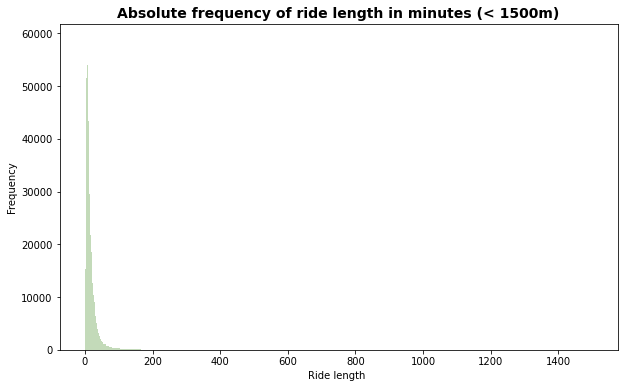

Fig. 01: Absolute frequency of ride length in minutes for all rides between 0 and 1500 minutes.

In [ ]:
with sns.axes_style('whitegrid'):
  sns.set_context(rc = {'patch.linewidth': 0.0})
  hp = sns.histplot(data=df, x="ride_length_minutes", color=my_palette[3], alpha=0.5)
  hp.figure.set_size_inches(10,6)
  hp.set_title("Absolute frequency ride length in minuntes (<240m)", fontsize=14, fontweight="bold");
  hp.set(xlabel="Ride length ", ylabel="Frequency")

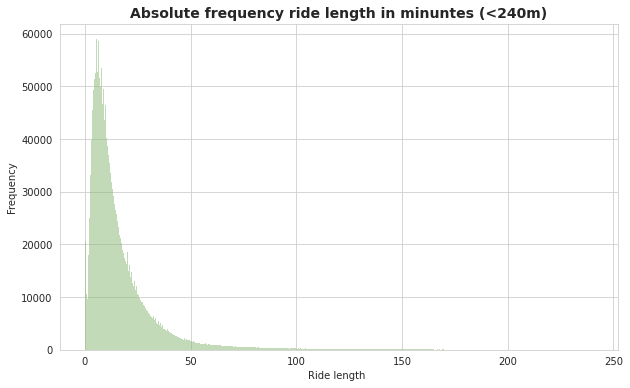

Fig. 03: Absolute frequency of rides between 0 and 240 minutes.

In [ ]:
# Fig. 4: Distribution of rides between 0 and 240m with costumer type distinction
with sns.axes_style('whitegrid'):
  sns.set_context(rc = {'patch.linewidth': 0.0})
  d = sns.displot(df, x="ride_length_minutes", hue="member_casual", kde=True, fill=True, palette=colors_member_casual)
  d.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
  d.set(xlabel="Ride length ", ylabel="Frequency")

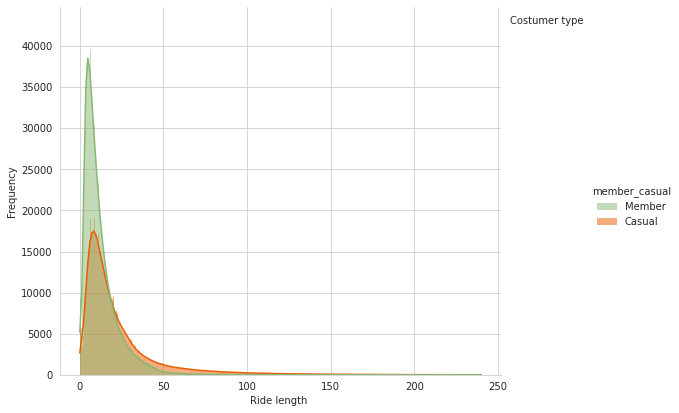

Fig. 04: Absolute frequency of ride lengths distincted by costumer type

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=all_rides.query('ride_length_minutes < 1500')["ride_length_minutes"], color=my_palette[3])
  grafico.set(title="Box plot of ride length in Minutes", xlabel="Ride Length")
  grafico.figure.set_size_inches(w=12, h=4)

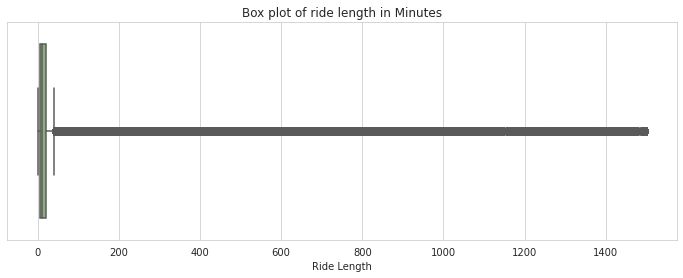

Fig. 05: Boxplot of data from all rides between 0 and 25h.

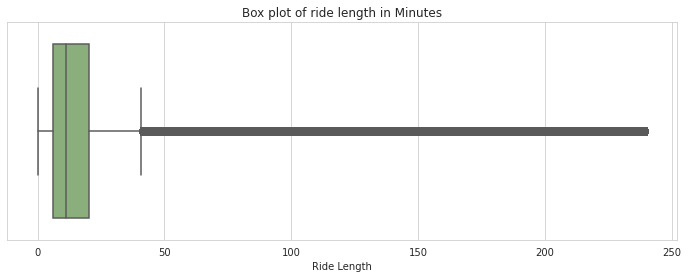

In [52]:
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df["ride_length_minutes"], color=my_palette[3])
  grafico.set(title="Box plot of ride length in Minutes", xlabel="Ride Length")
  grafico.figure.set_size_inches(w=12, h=4)

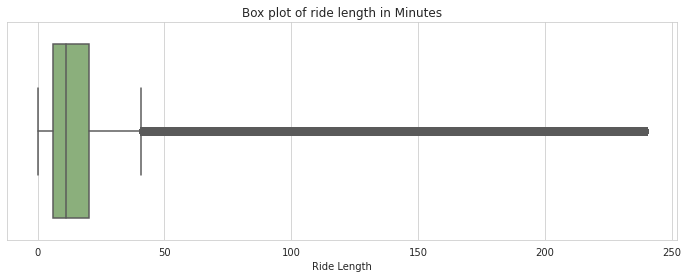

Fig. 06: Boxplot of rides between 0 and 4h.

## Statistical overview of ride lengths x days of week using boxplot

* Saturday and Sunday are the days with the longest trips, and trips that lasts more than ~45 minutes would be considereted outliers using the IQR 1.5 rules.
* For all the other days of the week, the IQR 1.5 rule stablish outliers between 30 and 40 minutes.

### ⏹Total Ride Length x Day of Week

In [ ]:
#Fig 1: Using rides from 0 to 1500 minutes
# with sns.axes_style('whitegrid'):
#   grafico = sns.boxplot(x=all_rides.query('ride_length_minutes < 1500')["ride_length_minutes"], y=df["day_of_week"], order=days_order, palette=colors_day_of_week)
#   grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week")
#   grafico.figure.set_size_inches(w=20, h=7)

![](https://drive.google.com/uc?export=view&id=19lFRUmz4oxb9MrFCjAqs3WkNMYYk7HW0)
Fig. 07: Boxplot of ride length in minutes separeted by day of week from all trips between 0 and 25h.

---



In [ ]:
# Fig. 2: Using only trips between 0 to 240 minutes.

with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["day_of_week"], order=days_order, palette=colors_day_of_week)
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
  grafico.figure.set_size_inches(w=20, h=7)

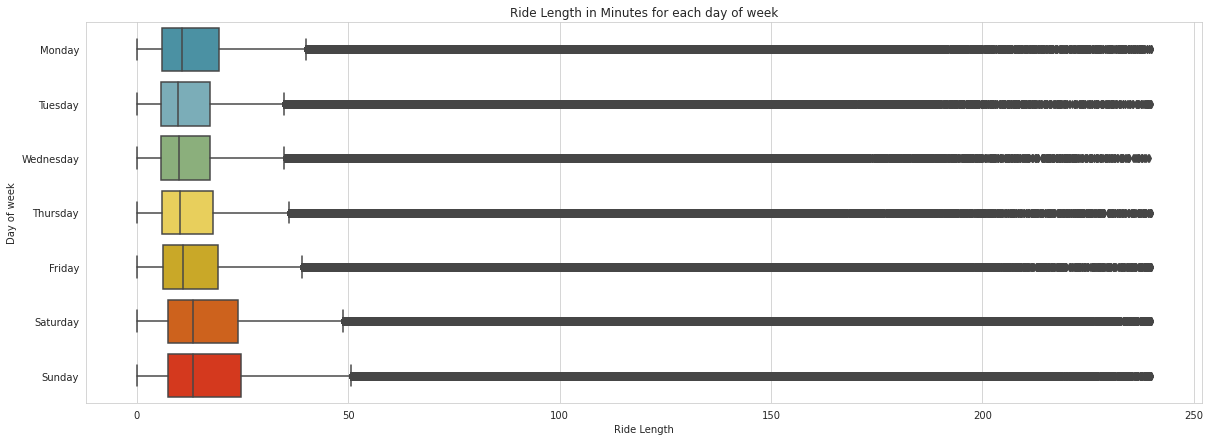

Fig. 08: Boxplot of ride length in minutes separeted by day of week from all trips between 0 and 4h.

In [ ]:
# Fig. 3: Using trips between 0 to 60 minutes.

# with sns.axes_style('whitegrid'):
#   grafico = sns.boxplot(x=one_hour_rides["ride_length_minutes"], y=one_hour_rides["day_of_week"], order=days_order, palette=colors_day_of_week)
#   grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
#   grafico.figure.set_size_inches(w=20, h=7)

![](https://drive.google.com/uc?export=view&id=19m38IRJQJGGq0eqmuakiE6eIdu6TCHUT)

Fig 09. Boxplot of ride length for rides between 0 and 60 minutes

---


In [ ]:
# Fig. 4: Violin plot give of trips between 0 to 240 minutes
with sns.axes_style('whitegrid'):
  grafico = sns.violinplot(x=df["day_of_week"], y=df["ride_length_minutes"], hue=df["member_casual"], palette=colors_member_casual)
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Day of week", ylabel="Ride Length");
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
  grafico.figure.set_size_inches(w=20, h=8)

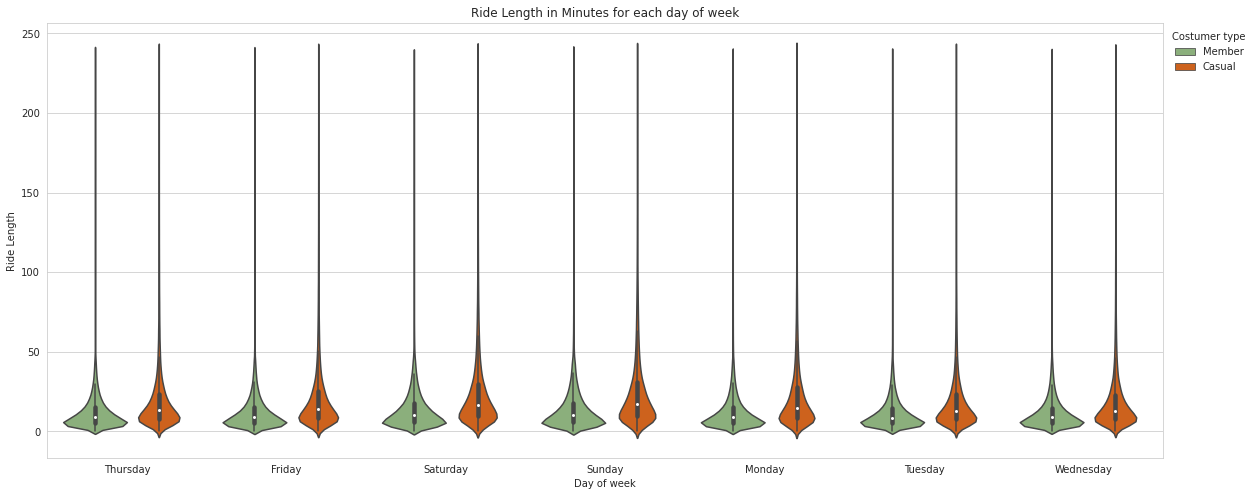

Fig. 10: Violin plot of ride length in minutes for each day of week with less than 4h.

---

## 🛑 Numerical data description for members/casual riders

The following dataframe shows a comparision for using both a threshold of 1500 minutes x a threshold of 240 minutes. They are all very simmilar so the

Table X: Statistical measures for rides between 0 and 1500 minutes (25h). 

|member\_casual|count|sum|mean|median|std|max|min|mode|i|
|---|---|---|---|---|---|---|---|---|---|
|casual|2556420|66937502\.73|26\.18407880160537|14\.83|64\.52889747668651|1499\.97|0\.02|8\.42|18\.6|
|member|3341851|43389541\.78|12\.983685322894408|9\.07|27\.36090816276441|1499\.97|0\.02|4\.33|10\.48|

<br>
<br>

Table X: Statistical measures for rides between 0 and 240 minutes (4h):

|member\_casual|count|sum|mean|median|std|max|min|mode|i|
|---|---|---|---|---|---|---|---|---|---|
|Casual|2545068|58246833\.52|22\.886160024015076|14\.77|25\.625752618019792|239\.97|0\.02|8\.42|18\.37|
|Member|3339106|41362284\.14|12\.387233031835468|9\.05|11\.857427536877651|239\.95|0\.02|4\.33|10\.45|

The following code is responsible for creating the second table:


### Calculating IQR for members and casual users

In [51]:
# Calculating IQR for members and casual users (using 240 minutes data)
grouped_df = df[['ride_length_minutes', 'member_casual']].groupby('member_casual')

In [52]:
q1, q3 = grouped_df.quantile(0.25), grouped_df.quantile(0.75)
iqr = q3 - q1
iqr

,ride_length_minutes
member_casual,
Casual,18.37
Member,10.45


### Creating a dataframe for statistical measures and merging with IQR

In [54]:
grouped_member_casual = df[['ride_length_minutes', 'member_casual']].groupby('member_casual').agg(['count', 'sum', 'mean', 'median', 'std', 'max', 'min', pd.Series.mode])


In [55]:
# Table X:
user_statistics = pd.merge(left=grouped_member_casual, right=iqr, on='member_casual', how="inner")
user_statistics = user_statistics.rename(lambda x: x[1], axis=1)
user_statistics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  """Entry point for launching an IPython kernel.


## 🛑 Describing categorical data

In [58]:
df[['ride_id', 'rideable_type', 'member_casual', 'day_of_week', 'month', 'date']].describe().T

,count,unique,top,freq
ride_id,5884174,5884174,B8BA05857944F445,1
rideable_type,5884174,3,classic_bike,3180344
member_casual,5884174,2,Member,3339106
day_of_week,5884174,7,Saturday,976354
month,5884174,12,July,819614
date,5884174,365,2021-08-14,37184


In [61]:
df[['ride_id', 'rideable_type', 'member_casual', 'day_of_week', 'month', 'date']].groupby('member_casual').describe()

ride_id                                 rideable_type         \
                 count   unique               top freq         count unique   
member_casual                                                                 
Casual         2545068  2545068  B68C8C61487B5C15    1       2545068      3   
Member         3339106  3339106  B8BA05857944F445    1       3339106      2   

                                     day_of_week                           \
                        top     freq       count unique       top    freq   
member_casual                                                               
Casual         classic_bike  1211412     2545068      7  Saturday  532663   
Member         classic_bike  1968932     3339106      7  Thursday  525491   

                 month                          date                            
                 count unique   top    freq    count unique         top   freq  
member_casual                                                                   
Casual         2545068     12  July  439619  2545068    365  2021-07-17  23383  
Member         3339106     12  June  399820  3339106    365  2021-10-19  15879

# 5️⃣ 📊 Supporting visualizations and key findings

Key findings with the followig plots:

* Casual riders are responsible for longer trips.
  * The average ride length for casual users was **22.88m**, the median was **14.77m** and the mode was **8.42m**. The Interquartile Range was 18.37.
  * The average ride length for members was **12.38m** and the median was **9.05m** and mode was **4.33m**. The Interquartile Range was 10.45.
* Members are responsible for the majority of rides
  * Casual users are responsible for **43.25%** of the rides in the time series.
  * Members are responsible for **56.75%** of the rides in the time series.
* Members use the service more frequently during the work days, and casual users on the weekend
* Members use the bike for shorter rides in minutes, and casual users in average stays with the bike two times longer than members
* June, July and August were the months with more bike rides in total
* From September onwards, the total number of bicycles rides drops considerably, reaching its minimum in January, followed by February
* November, December, March and April showed similar number of rides



In [ ]:
month_count = df[['ride_length_minutes', 'member_casual', 'month']].groupby(['month', 'member_casual'], as_index=False).agg('count')


## ⏹ Total Ride Length x Costumer Type


Fig. 5: Boxplot of ride length in minutes for costumer type

---


In [ ]:
# Fig. 11 Uses all rides between 0 to 240
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["member_casual"], palette=colors_member_casual)
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Costumer Type");
  grafico.figure.set_size_inches(w=20, h=7)

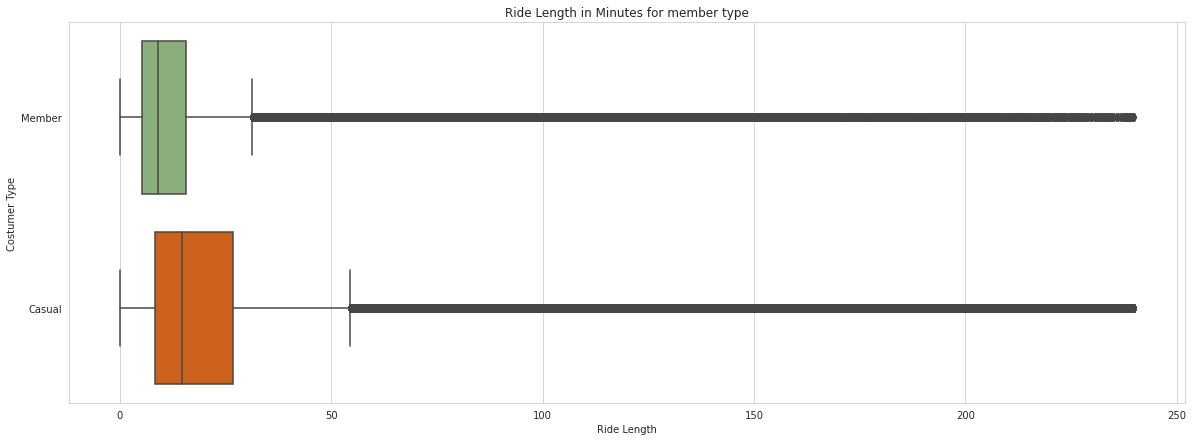

Fig. 11: Box plot of ride length by costumer type (<4h)

## 🟠 Monthly Day of Week x Total Ride Length

In [92]:
# Fig. 12: This don't help much but I'll keep as a reference of using "col" in the future :)

# grafico = sns.relplot(data=all_rides.query('ride_length_minutes < 1500'), y='ride_length_minutes', x='int_day_of_week', hue="member_casual", col="int_month", col_order=months_order,col_wrap=3, alpha=0.7, palette=colors_member_casual)
# grafico.set(title="Average ride length in minutes for each day of week by month (2021-2022)", ylabel="Total ride length (minutes)", xlabel="Day of week")
# grafico.fig.subplots_adjust(top=.9)
# grafico.set_titles(col_template="{col_name}")


![](https://drive.google.com/uc?export=view&id=1A2lDlwuZGABIfpHfEFbYr6hFHz-uvNlN)
Fig. 12: Monthly Day of Week x Total ride length from July 2021 - June 2022 (<4h)

---

## 📊 Month | Day of Week x Avg Ride Length 

In [ ]:
# Fig. 13
with sns.axes_style('whitegrid'):
  g = sns.barplot(data=df, 
                  y='ride_length_minutes', 
                  x='int_month', 
                  order=months_order, 
                  hue="day_of_week", 
                  hue_order=days_order, 
                  palette=colors_day_of_week, 
                  capsize=.15, 
                  errwidth=0.2)
  g.set_title("Average ride length in minutes per month (2021 - 2022)", fontsize=14, fontweight="bold");
  g.set(xlabel="Month", ylabel="Average ride length")
  g.figure.set_size_inches(14,7)
  plt.legend(title="Day of week", loc = 2, bbox_to_anchor = (1,1))


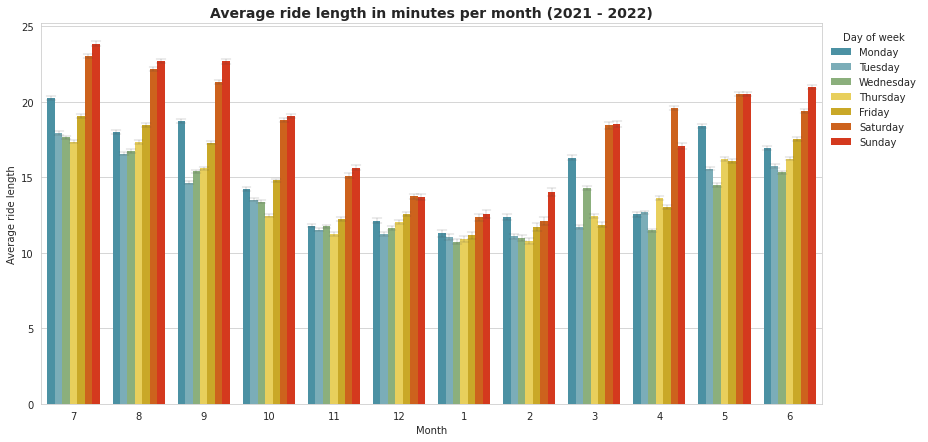

Fig. 13: Global average ride length for each day of week in minutes per month

---

## 📈 Global Month x Avg Ride Length

In [ ]:
# Fig 14:
with sns.axes_style('whitegrid'):
  graph = sns.pointplot(data=df, 
                        x=df["int_month"], 
                        y=df["ride_length_minutes"], 
                        hue=df["member_casual"], 
                        order=months_order, 
                        palette=colors_member_casual,
                        capsize=.15,
                        errwidth=0.5)
  graph.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
  graph.set(xlabel="Month", ylabel="Average ride length")
  graph.figure.set_size_inches(10,6)
  plt.legend(loc = 2, bbox_to_anchor = (1,1))

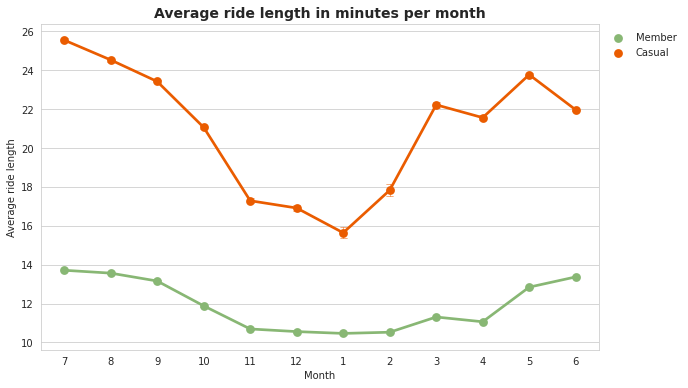

Fig. 14: Average ride length in minutes per month by costumer type

---

## 📈 Monthly Day of Week x Avg Lenght  

In [90]:
# Creates a list of df for each month 
months = [df.query(f'int_month == {i}') for i in range(1, 13)]

In [ ]:
# Fig. 15
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(3, 4, figsize=(24, 12)) # sharex=True, 
  fig.suptitle(t='Mean ride length for each day of week, by month', fontsize=16, fontweight="bold")
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  m = 6
  year = 2021

  for i in range(3):
    for j in range(4):
      g = sns.lineplot(ax=axes[i, j], x=months[m]['int_day_of_week'], y=months[m]['ride_length_minutes'], hue=months[m]['member_casual'], hue_order=["Member", "Casual"], palette=colors_member_casual)
      g.set(xlabel="Day of week", ylabel="Average ride length", ylim=(0, 33))
      axes[i, j].set_title(f"{month_names[m+1]} - {year}", fontsize=14)
      m += 1
      if m == 12:
        m = 0
        year = 2022

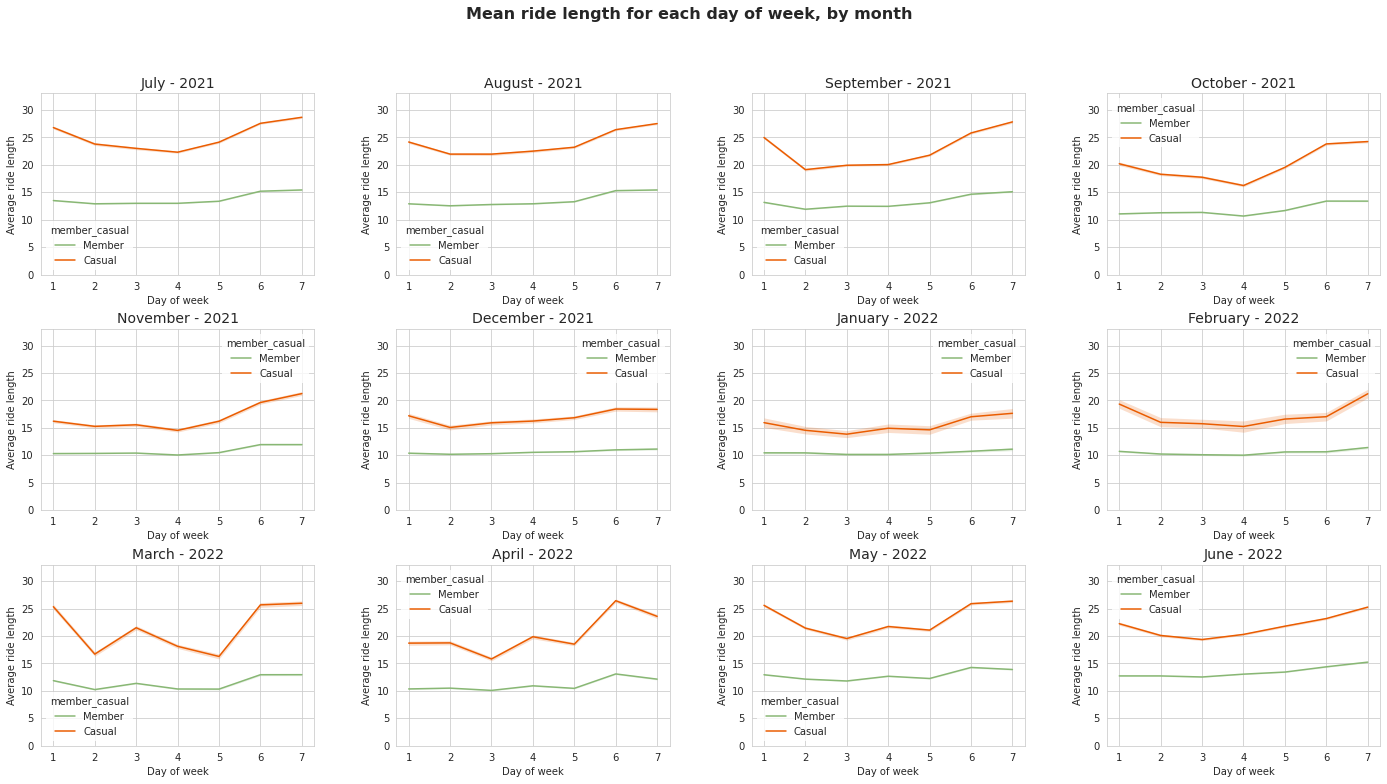
Fig. 15: Comparision of ride length for members and casual users by each day of week from July 2021 - June 2022. Casual users showed higher ride length during all the period.

---


## 📈 Month X Total Count 

In [94]:
total_month_count = df[['int_month', 'ride_length']].groupby('int_month', as_index=False, sort=False).agg('count')
total_month_count.rename(columns={"ride_length": "count"}, inplace=True)


In [ ]:
# Fig. 16:
with sns.axes_style('whitegrid'):
  d = sns.barplot(data=total_month_count, x='int_month', y='count', order=months_order, palette=my_palette)
  d.set_title("Total rides by month", fontsize=14, fontweight="bold");
  d.set(xlabel="Month (2021 - 2022)", ylabel="Count")
  d.figure.set_size_inches(10,6)


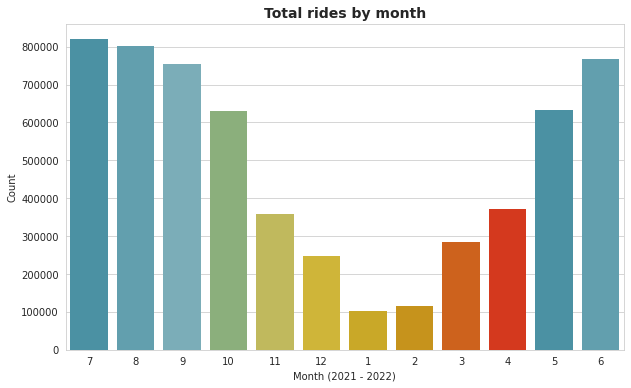

Fig. 16: Total rides (\<4h) from July 2021 to June 2022

## 📊 Day of Week x Count

In [96]:
day_of_week = df[['day_of_week', 'ride_length', 'member_casual']].groupby(['day_of_week', 'member_casual'], as_index=False).agg('count')
day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
# Fig. 17:

with sns.axes_style('whitegrid'):
  days_count = sns.barplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, order=days_order)
  days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
  days_count.set(xlabel="Day of week", ylabel="Count")
  days_count.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

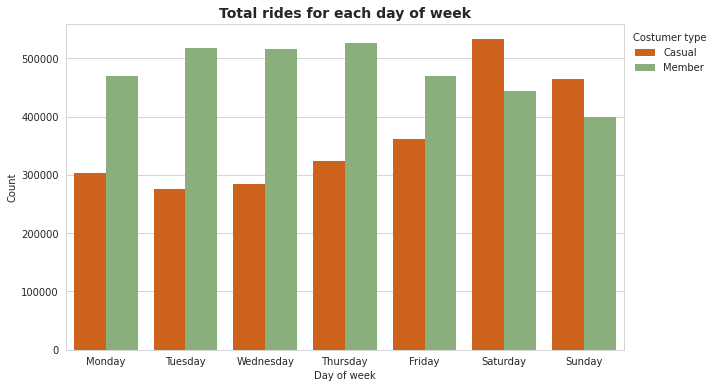

Fig. 17: Total rides by costumer type for each day of week

---

## 📈 Day of Week x Count

In [ ]:
#Fig. 18:
with sns.axes_style('whitegrid'):
  days_count = sns.pointplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, linewidth=3)
  days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
  days_count.set(xlabel="Day of week", ylabel="Count")
  days_count.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

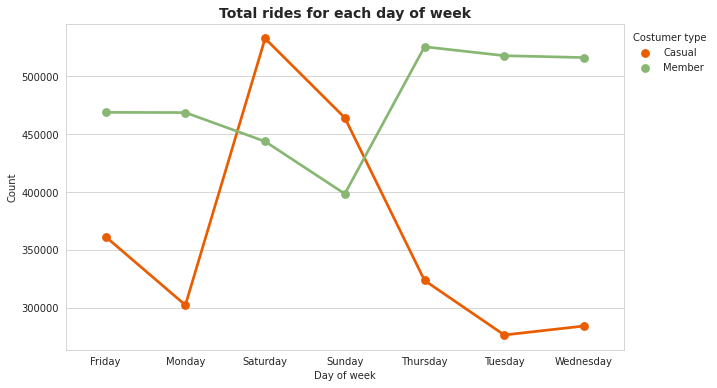

Fig. 18: Line plot of total rides for each day of week.

---

## 📊 Global Month x Count 

In [100]:
grouped_months= df[['int_month', 'ride_length', 'member_casual']].groupby(['int_month', 'member_casual'], as_index=False, sort=False).agg('count')
grouped_months.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
# Fig. 19:
with sns.axes_style('whitegrid'):
  months_count = sns.barplot(data=grouped_months, x='int_month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
  months_count.set_title("Total rides for each month from July 2021 - June 2022", fontsize=14, fontweight="bold");
  months_count.set(xlabel="Month", ylabel="Count")
  months_count.figure.set_size_inches(10,6)
  plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

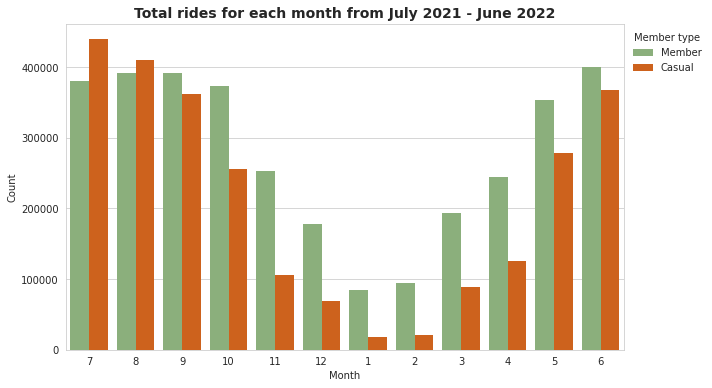

Fig. 19: Total number of rides by month

---


## 📈 Global Month x Count 

In [ ]:
# Fig. 20:
with sns.axes_style('whitegrid'):
  g = sns.pointplot(data=grouped_months, 
                             x='int_month', 
                             y='count', 
                             hue='member_casual', 
                             order=months_order, 
                             palette=colors_member_casual, 
                             linewidth=3)
  g.set_title("Total rides by month", fontsize=14, fontweight="bold");
  g.set(xlabel="Month", ylabel="Count")
  g.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

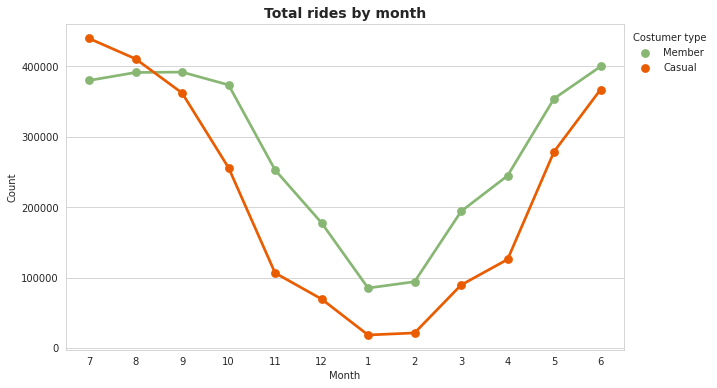

Fig 20: Total rides by month by costumer type

---



## 📈 Month x Count & Month x Avg Length

In [104]:
grouped_months_mean= df[['int_month', 'ride_length_minutes', 'member_casual']].groupby(['int_month', 'member_casual'], sort=False, as_index=False).agg('mean')

In [ ]:
# Fig. 21:
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(1, 2, figsize=(15, 6))
  fig.suptitle('Ride counts and average ride lenght')
 

  m = 6
  year = 2021

  sns.pointplot(ax=axes[0], data=grouped_months, x='int_month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual, linewidth=2)
  axes[0].set_title("Month x Total rides")
  axes[0].set(xlabel="Month (2021 - 2022)")

  sns.pointplot(ax=axes[1], data=grouped_months_mean, x='int_month', y='ride_length_minutes', hue='member_casual', order=months_order, palette=colors_member_casual, linewidth=2)
  axes[1].set_title("Month x Ride length")
  axes[1].set(xlabel="Month (2021 - 2022)")
  axes[1].set(ylabel="Average ride length (min)")
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

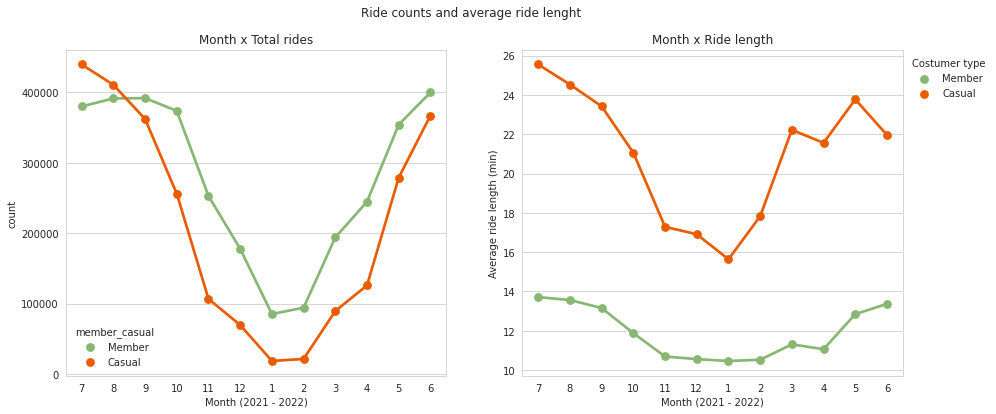


Fig. 21: Month x Total Ride and Month x Average Ride Length  by costumer type

---


## 📈 Monthly Day of Week x Count


In [106]:
month_day_of_week = df[['int_month', 'int_day_of_week', 'ride_length', 'member_casual']].groupby(['int_month', 'int_day_of_week', 'member_casual'], as_index=False).agg('count')
month_day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
# Fig. 22:
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
  fig.suptitle(t='Ride count for each day of week, by month', fontsize=16, fontweight="bold")
  fig.subplots_adjust(hspace=0.3, wspace=0.3)
  # fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

  m = 6
  year = 2021

  for i in range(3):
    for j in range(4):
      month_df = month_day_of_week.query(f'int_month == {m}')
      gf = sns.pointplot(ax=axes[i, j], data=month_df, x='int_day_of_week', y='count', hue='member_casual', hue_order=["Member", "Casual"], palette=colors_member_casual)
      gf.set(xlabel="Day of week", ylabel="Count")
      axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
      m += 1
      if m == 13:
        m = 1
        year = 2022

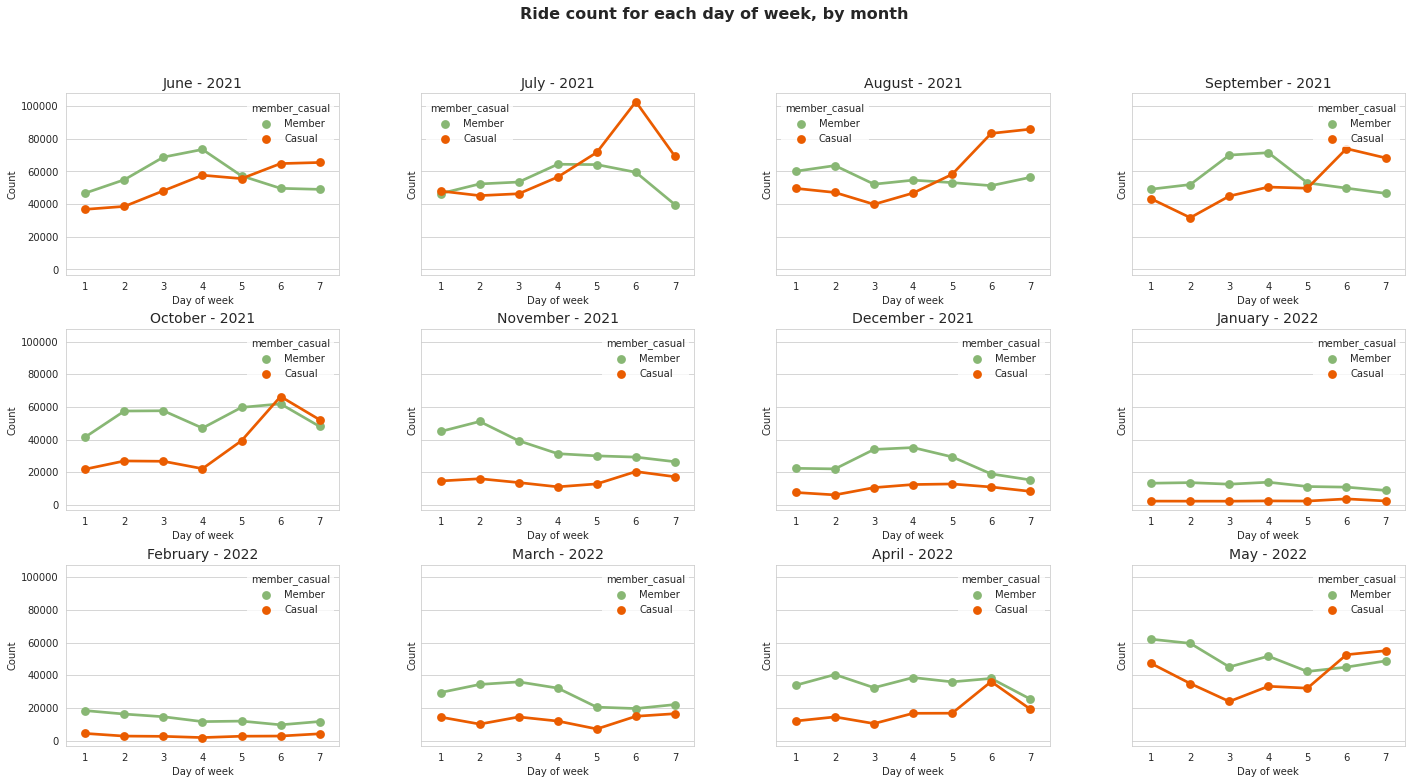

Fig. 22: Daily number of rides by months


## 📈 Global Hour X Count

In [108]:
hour_count = df[['hour', 'ride_length', 'member_casual']].groupby(['hour', 'member_casual'], as_index=False).agg('count')
hour_count.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
# Fig. 23:
with sns.axes_style('whitegrid'):
  h = sns.pointplot(data=hour_count, x='hour', y='count', hue='member_casual', palette=colors_member_casual)
  h.set_title("Total rides for each hour", fontsize=14, fontweight="bold");
  h.set(xlabel="Hour", ylabel="Count")
  h.figure.set_size_inches(12,6)
  plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

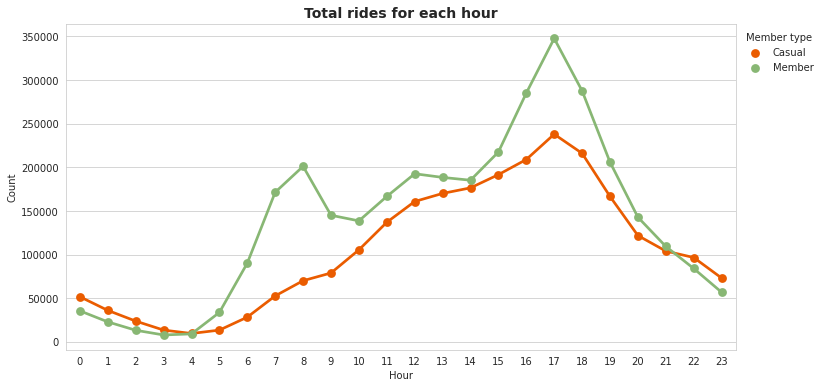

Fig. 23: Bar chart for hourly global number of rides

---

## 📉 Monthly Hour x Count 

In [110]:
hour_month_count = df[['hour', 'ride_length', 'int_month', 'member_casual']].groupby(['int_month', 'hour', 'member_casual'], as_index=False).agg('count')
hour_month_count.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
# Fig. 24:
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
  fig.suptitle(t='Ride count for hour, by month', fontsize=16, fontweight="bold")
  fig.subplots_adjust(hspace=0.3, wspace=0.15)
  # fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

  m = 7
  year = 2021

  for i in range(3):
    for j in range(4):
      month_df = hour_month_count.query(f'int_month == {m}')
      gf = sns.lineplot(ax=axes[i, j], data=month_df, x='hour', y='count', hue='member_casual', hue_order=["Member", "Casual"], palette=colors_member_casual)
      gf.set(xlabel="Hour", ylabel="Count")
      axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
      m += 1
      if m == 13:
        m = 1
        year = 2022

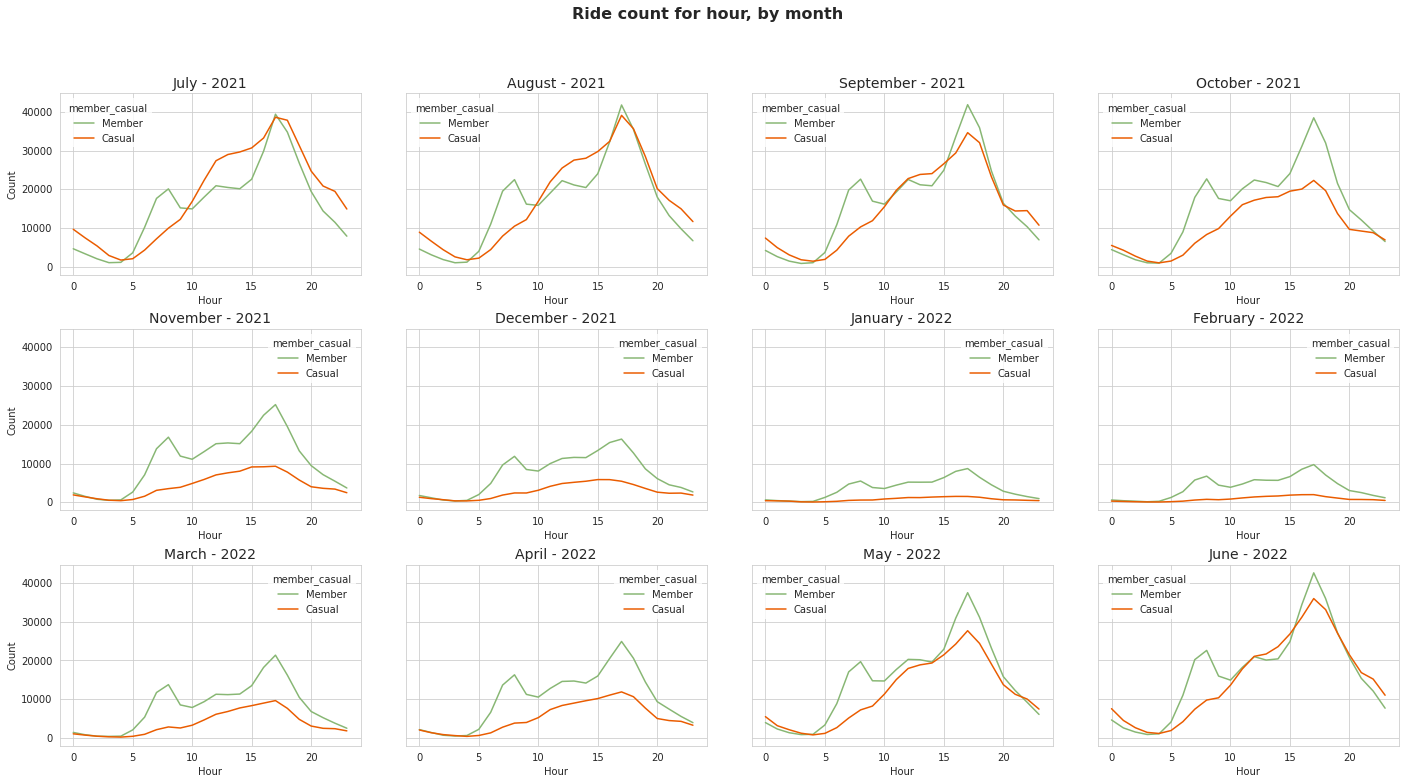
Fig. 24: Monthly number of rides by hour from July 2021 - June 2022

## Pivot tables and Heatmaps

### 💠 Month x Day of week

In [114]:
day_month_count = df[['int_month', 'ride_length', 'day_of_week']].groupby(['int_month', 'day_of_week'], as_index=False, sort=False).agg('count')
day_month_count.rename(columns={"ride_length": "count"}, inplace=True)

In [115]:
pivot_day_month = day_month_count.pivot("day_of_week", "int_month", "count")
pivot_day_month = pivot_day_month.reindex(months_order, axis=1)

In [ ]:
# Fig. 25:
heatmd = sns.heatmap(data=pivot_day_month, cmap="Spectral_r")
heatmd.set_title("Rides per day of week for each month ", fontsize=14, fontweight="bold")
heatmd.set(xlabel="Month", ylabel="Day of Week")
heatmd.figure.set_size_inches(10,4)

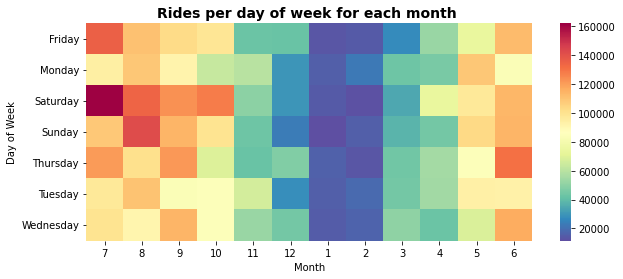

Fig. 25: Heat map of number of rides Month X Week day

---

### 💠 Day of week x Hour

#### Global 

In [117]:
# Creating dataframe
hour_day_count = df[['hour', 'ride_length', 'day_of_week']].groupby(['day_of_week', 'hour'], as_index=False).agg('count')
hour_day_count.rename(columns={"ride_length": "count"}, inplace=True)

In [118]:
pivot_hour_day = hour_day_count.pivot("day_of_week", "hour", "count")
pivot_hour_day = pivot_hour_day.reindex(days_order, axis=0)

In [ ]:
# Fig. 26:
heatdh = sns.heatmap(data=pivot_hour_day, cmap="Spectral_r")
heatdh.set_title("Rides per hour for each day of week ", fontsize=14, fontweight="bold")
heatdh.set(xlabel="Hour", ylabel="Day of week")
heatdh.figure.set_size_inches(12,5)

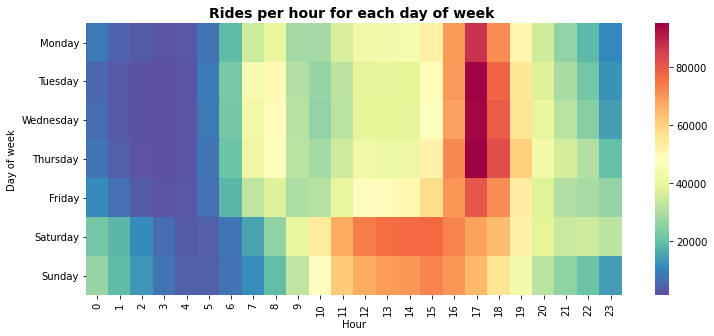

Fig. 26: Heatmap of global number of rides Hour x Day of week

---


#### Members

In [120]:
hour_day_count_member = df.query("member_casual == 'Member'")[['hour', 'ride_length', 'day_of_week']].groupby(['day_of_week', 'hour'], as_index=False).agg('count')
hour_day_count_member.rename(columns={"ride_length": "count"}, inplace=True)

In [121]:
pivot_hd_member = hour_day_count_member.pivot("day_of_week", "hour", "count")
pivot_hd_member = pivot_hd_member.reindex(days_order, axis=0)

In [ ]:
# Fig. 27:
heatdhm = sns.heatmap(data=pivot_hd_member, cmap="Spectral_r")
heatdhm.set_title("Rides per hour for each day of week by members", fontsize=14, fontweight="bold")
heatdhm.set(xlabel="Hour", ylabel="Day of week")
heatdhm.figure.set_size_inches(10,4)

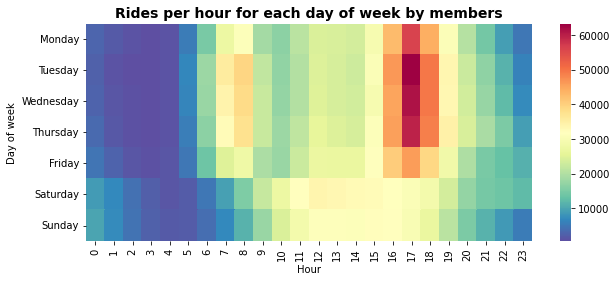

Fig. 27: Heat map of members number of rides - Hour x Day of week



#### Casual

In [123]:
hour_day_count_casual = df.query("member_casual == 'Casual'")[['hour', 'member_casual', 'day_of_week']].groupby(['day_of_week', 'hour'], as_index=False).agg('count')
hour_day_count_casual.rename(columns={"member_casual": "count"}, inplace=True)


In [124]:
pivot_hd_casual = hour_day_count_casual.pivot("day_of_week", "hour", "count")
pivot_hd_casual = pivot_hd_casual.reindex(days_order, axis=0)

In [ ]:
# Fig. 28:
heatdhc = sns.heatmap(data=pivot_hd_casual, cmap="Spectral_r")
heatdhc.set_title("Rides per hour for each day of week by casual users", fontsize=14, fontweight="bold")
heatdhc.set(xlabel="Hour", ylabel="Day of week")
heatdhc.figure.set_size_inches(10,4)

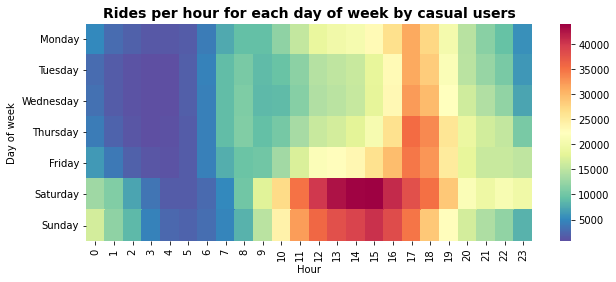

Fig. 28: Heat map of casual users number of rides - Hour x Day of week

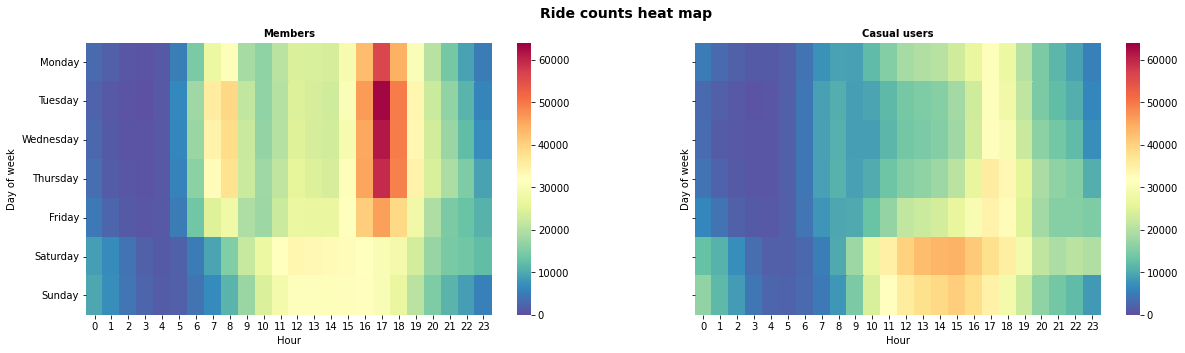

Fig. 29: Heat map of hour x week number of rides by costumer type.

In [ ]:
# Fig. 29: 
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Ride counts heat map',fontsize=14, fontweight="bold")

sns.heatmap(ax=axes[0], data=pivot_hd_member, cmap="Spectral_r", vmin=0, vmax=64000)
axes[0].set_title("Members", fontsize=10, fontweight="bold")
axes[0].set(xlabel="Hour", ylabel="Day of week")

sns.heatmap(ax=axes[1], data=pivot_hd_casual, cmap="Spectral_r", vmin=0, vmax=64000)
axes[1].set_title("Casual users", fontsize=10, fontweight="bold")
axes[1].set(xlabel="Hour", ylabel="Day of week")


# 6️⃣ 💡 Your top three recommendations based on your analysis


* <p align='justify'>Casual users are more likely to use the bike on the weekend, specially on Saturday. They also  stay with the bike for a longer period of time, and the bike use is propably highly associated with sports and leisure activities. Therefore, weekend (starting on Friday) would be a interesting period of the week to invest in advertising strategies using social media. It could help to increase awareness from casual riders who are going to use the service for leisure of other benefits and possibilities, like using during the week to engage with day life activities, and a reliable and sustainable option.
* <p align='justify'>July was the only month in which casual users outnumbered members in number of trips. This is also a good oportunity to addvertise, since the number of people that naturally chose to use the service is high, they'll be more aware of  the company and its benefit.</p>
* <p align='justify'>Winter months face a significant decrease in general activities, so in this period the company could offer better discounts to casual users, compensating for the low use of casual riders.</p>

Some gaps are present in the analysis without a clear comprehension of the data. Is the longer period of time that casual users stay with the bike is also associated with higher distances between start and end stations? I'm still working on these conclusions, further analysis using latitude and longitude can help to fill these gaps, and some other information about how the company can act, like:
* Offering different pricing plans and shorter plans, like six month plan which could atrack more people to start a membership at any month of the year, or even shorter plans, so in summer when people are more interested in using the bikes they can have they first experience with the company
* Offering a discount in the first month of membership for those who already used the service as a casual user.